In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\Kerry\UN Countries Metrics 2025.csv')
df.shape

(194, 8)

In [2]:
df.head()

,country_name,Population (in millions),Nominal Gross Domestic Product (in USD),Nominal GDP Per capita (in USD),GDP Per capita PPP (in USD),Human Development Index (HDI),GINI,AREA (in Sq km)
0,Afghanistan,"41,454,761",$17.329 billion,411,"2,174",0.496,35.2,"652,867"
1,Albania,"2,402,113",$28.372 billion,"10,526","23,404",0.810,33.0,"28,748"
2,Algeria,"46,700,000",$266.78 billion,"5,722","16,483",0.763,27.6,"2,381,741"
3,Andorra,"87,486",$3.897 billion,"44,900","69,146",0.913,40.0,467.63
4,Angola,"39,040,039",$93.796 billion,"2,432",7077,0.616,51.3,"1,246,700"


In [3]:
df.tail()

,country_name,Population (in millions),Nominal Gross Domestic Product (in USD),Nominal GDP Per capita (in USD),GDP Per capita PPP (in USD),Human Development Index (HDI),GINI,AREA (in Sq km)
189,Venezuela,"30,518,260",$92.210 billion,"3,474","7,985",0.709,44.8,"916,445"
190,Vietnam,"100,300,000",$465.814 billion,"4,623","15,470",0.766,36.1,"331,344.82"
191,Yemen,"41,385,529",$21.045 billion,617,"2,053",0.470,36.7,"455,503"
192,Zambia,"20,216,029",$29.536 billion,"1,435","4,068",0.595,51.5,"752,617"
193,Zimbabwe,"16,868,409",$32.424 billion,"2,005","2,749",0.598,50.3,"390,757"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 8 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   country_name                             194 non-null    object 
 1   Population (in millions)                 194 non-null    object 
 2   Nominal Gross Domestic Product (in USD)  194 non-null    object 
 3   Nominal GDP Per capita (in USD)          194 non-null    object 
 4   GDP Per capita PPP (in USD)              194 non-null    object 
 5   Human Development Index (HDI)            192 non-null    float64
 6   GINI                                     174 non-null    float64
 7   AREA (in Sq km)                          194 non-null    object 
dtypes: float64(2), object(6)
memory usage: 12.3+ KB


In [5]:
df.describe()

,Human Development Index (HDI),GINI
count,192.000000,174.000000
mean,0.736099,36.450920
std,0.159465,7.875269
min,0.000000,16.600000
25%,0.623500,30.712500
50%,0.755000,35.350000
75%,0.859000,40.975000
max,0.972000,63.000000


In [6]:
df.isnull().sum()

country_name                                0
Population (in millions)                    0
Nominal Gross Domestic Product (in USD)     0
Nominal GDP Per capita (in USD)             0
GDP Per capita PPP (in USD)                 0
Human Development Index (HDI)               2
GINI                                       20
AREA (in Sq km)                             0
dtype: int64

In [7]:
df['GINI'] = df['GINI'].fillna(df['GINI'].median())

In [8]:
df['Human Development Index (HDI)'] = df['Human Development Index (HDI)'].fillna(df['Human Development Index (HDI)'].median())

In [9]:
df.duplicated().sum()

0

In [11]:
# Converting srtings to numbers
def convert_gdp(value):
    if pd.isnull(value):
        return None
    value = value.replace("$", "").strip().lower()
    if "billion" in value:
        return float(value.replace("billion", "").strip()) * 1e9
    elif "million" in value:
        return float(value.replace("million", "").strip()) * 1e6
    elif "trillion" in value:
        return float(value.replace("trillion", "").strip()) * 1e12
    else:
        try:
            return float(value)
        except:
            return None

# Apply the function
df["Nominal_GDP_Numeric"] = df["Nominal Gross Domestic Product (in USD)"].apply(convert_gdp)

# Check result
print(df[["Nominal Gross Domestic Product (in USD)", "Nominal_GDP_Numeric"]].head())

  Nominal Gross Domestic Product (in USD)  Nominal_GDP_Numeric
0                         $17.329 billion         1.732900e+10
1                         $28.372 billion         2.837200e+10
2                         $266.78 billion         2.667800e+11
3                          $3.897 billion         3.897000e+09
4                         $93.796 billion         9.379600e+10


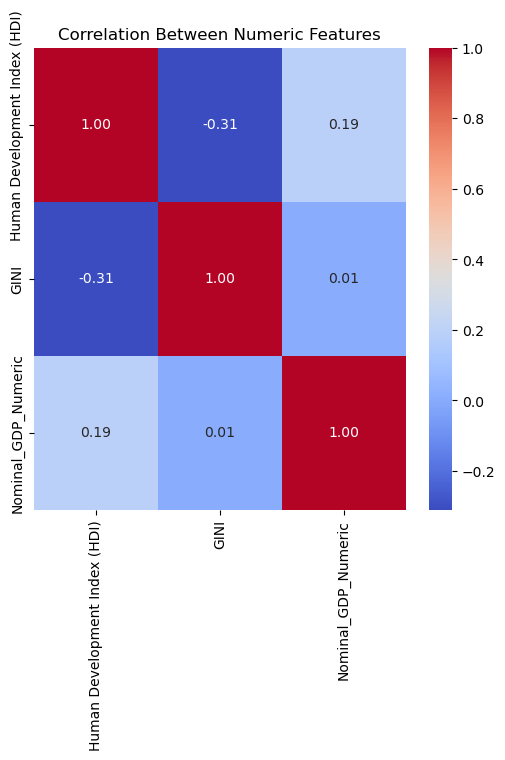

In [13]:
plt.figure(figsize=(6, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Numeric Features")
plt.show()

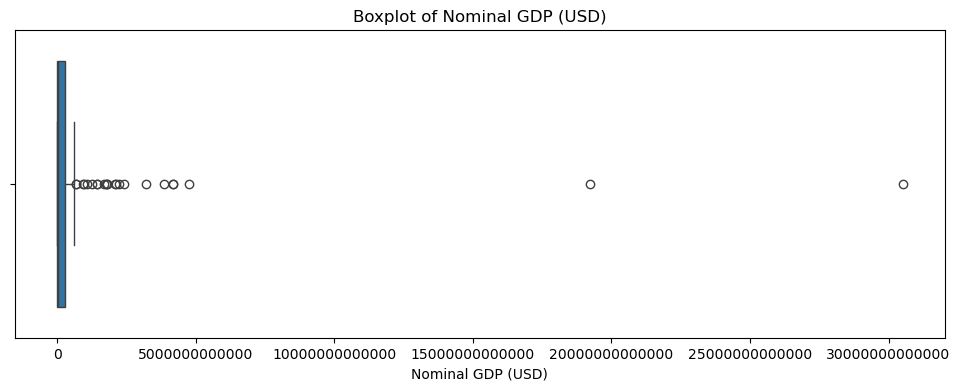

In [15]:
plt.figure(figsize=(12,4))
sns.boxplot(x=df['Nominal_GDP_Numeric'])
plt.title("Boxplot of Nominal GDP (USD)")
plt.xlabel("Nominal GDP (USD)")
plt.ticklabel_format(style='plain', axis='x')
plt.show()

C:\Users\Kerry\AppData\Local\Temp\ipykernel_9768\1326046013.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_gdp, x='Nominal_GDP_Numeric', y='country_name', palette='viridis')


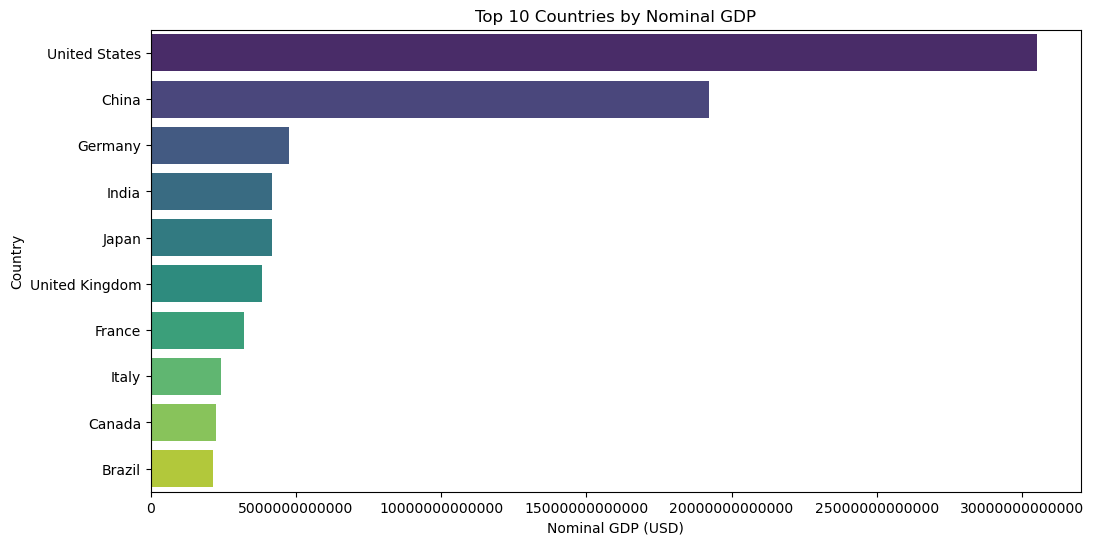

In [17]:
top_gdp = df[['country_name', 'Nominal_GDP_Numeric']].dropna().sort_values(by='Nominal_GDP_Numeric', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top_gdp, x='Nominal_GDP_Numeric', y='country_name', palette='viridis')
plt.title("Top 10 Countries by Nominal GDP")
plt.xlabel("Nominal GDP (USD)")
plt.ylabel("Country")
plt.ticklabel_format(style='plain', axis='x')
plt.show()